In [577]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

In [642]:
# Read files to pandas dataframes
train = pd.read_csv('new_df.csv')
test = pd.read_csv('new_test.csv')

In [643]:
train.columns.values

array(['ABSOLUTE(placurv)', 'aspect + slope_x_twi',
       'elevation + slope_var', 'elevation + slope_x_twi',
       'elevation_bins + rel_sdoif', 'elevation_bins + slope_x_twi',
       'elevation_var + slope_var', 'geology + placurv',
       'geology + procurv', 'geology + rel_sdoif', 'geology + sdoif',
       'placurv + ring1_elevation', 'placurv + sdoif',
       'procurv + ring1_elevation', 'procurv + sdoif',
       'ring1_elevation + sdoif', 'sdoif + weathered',
       'slope + slope_x_twi', 'aspect * procurv', 'aspect * slope_var',
       'aspect * slope_x_twi', 'elevation * elevation_dif',
       'elevation * geology', 'elevation * sdoif',
       'elevation * slope_x_twi', 'elevation_bins * slope_var',
       'elevation_bins * slope_x_twi', 'elevation_dif * sdoif',
       'elevation_var * geology', 'elevation_var * placurv',
       'elevation_var * sdoif', 'elevation_var * slope_var',
       'elevation_var * weathered', 'geology * sdoif',
       'geology * slope_x_twi', 'geology

In [644]:
cols = ['Sample_ID', 'ABSOLUTE(placurv)', 'aspect + slope_x_twi',
       'elevation + slope_var', 'elevation + slope_x_twi',
       'elevation_bins + rel_sdoif', 'elevation_bins + slope_x_twi',
       'elevation_var + slope_var', 'geology + placurv',
       'geology + procurv', 'geology + rel_sdoif', 'geology + sdoif',
       'placurv + ring1_elevation', 'placurv + sdoif',
       'procurv + ring1_elevation', 'procurv + sdoif',
       'ring1_elevation + sdoif', 'sdoif + weathered',
       'slope + slope_x_twi', 'aspect * procurv', 'aspect * slope_var',
       'aspect * slope_x_twi', 'elevation * elevation_dif',
       'elevation * geology', 'elevation * sdoif',
       'elevation * slope_x_twi', 
       'elevation_bins * slope_x_twi', 'elevation_dif * sdoif',
       'elevation_var * geology', 'elevation_var * placurv',
       'elevation_var * sdoif', 'elevation_var * slope_var',
       'elevation_var * weathered', 'geology * sdoif',
       'geology * slope_x_twi', 'geology * weathered',
       'placurv * slope_var', 'placurv * slope_x_twi',
       'rel_sdoif * ring1_elevation', 'ring1_elevation * sdoif',
       'ring1_elevation * slope_var', 'sdoif * slope_x_twi',
       'sdoif * weathered', 'slope_var * weathered',
       'NATURAL_LOGARITHM(sdoif_var)', 'SQUARE_ROOT(sdoif_var)', 'Label']

train = train[cols]
cols.remove('Label')
test = test[cols]

df = train

In [326]:
train.to_csv('train_agg_with_dummy.csv', index = False)
test.to_csv('test_agg_with_dummy.csv', index = False)

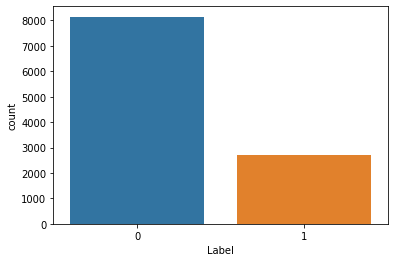

In [525]:
sns.countplot(x = 'Label', data=df)

In [526]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]


os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Label'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no landslides in oversampled data",len(os_data_y[os_data_y['Label']==0]))
print("Number of landslides",len(os_data_y[os_data_y['Label']==1]))
print("Proportion of no landslides data in oversampled data is ",len(os_data_y[os_data_y['Label']==0])/len(os_data_X))
print("Proportion of landslides data in oversampled data is ",len(os_data_y[os_data_y['Label']==1])/len(os_data_X))

length of oversampled data is  11378
Number of no landslides in oversampled data 5689
Number of landslides 5689
Proportion of no landslides data in oversampled data is  0.5
Proportion of landslides data in oversampled data is  0.5


In [527]:
#X = df.iloc[:, 1:-1]
#y = df.iloc[:, -1]
data_final_vars=df.columns.values.tolist()
y = ['Sample_ID', 'Label']
cols=[i for i in df if i not in y] 
X=os_data_X[cols]
y=os_data_y['Label']

In [528]:
#X = df.iloc[:, 1:-1]
#y = df.iloc[:, -1]

In [529]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=69)

In [530]:
main_cols = train.columns.difference(['Sample_ID', 'Label'])
test_df = test[main_cols]

In [531]:
test_df = test_df[list(X_test.columns.values)]

In [532]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [533]:
test_array_scaled = scaler.transform(test_df)

In [535]:
EPOCHS = 100
BATCH_SIZE = 64
LEARNING_RATE = 0.001

In [536]:
## train data
class TrainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = TrainData(torch.FloatTensor(X_train), torch.FloatTensor(y_train.values))
## test data    
class TestData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = TestData(torch.FloatTensor(X_test))

In [537]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)

In [538]:
real_test_data = TestData(torch.FloatTensor(test_array_scaled))
real_test_loader = DataLoader(dataset=real_test_data, batch_size=1)

In [544]:
class BinaryClassification(nn.Module):
    def __init__(self):
        super(BinaryClassification, self).__init__()
        # Number of input features is 11.
        self.layer_1 = nn.Linear(46, 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [545]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [546]:
model = BinaryClassification()
model.to(device)
print(model)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

BinaryClassification(
  (layer_1): Linear(in_features=46, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [547]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [548]:
model.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 001: | Loss: 0.48129 | Acc: 77.096
Epoch 002: | Loss: 0.41951 | Acc: 80.784
Epoch 003: | Loss: 0.40620 | Acc: 81.760
Epoch 004: | Loss: 0.39663 | Acc: 82.216
Epoch 005: | Loss: 0.38835 | Acc: 82.184
Epoch 006: | Loss: 0.38409 | Acc: 82.648
Epoch 007: | Loss: 0.37409 | Acc: 83.696
Epoch 008: | Loss: 0.36999 | Acc: 83.832
Epoch 009: | Loss: 0.36421 | Acc: 83.792
Epoch 010: | Loss: 0.35650 | Acc: 84.504
Epoch 011: | Loss: 0.35776 | Acc: 84.736
Epoch 012: | Loss: 0.35171 | Acc: 84.248
Epoch 013: | Loss: 0.34745 | Acc: 84.768
Epoch 014: | Loss: 0.35008 | Acc: 84.800
Epoch 015: | Loss: 0.34542 | Acc: 85.184
Epoch 016: | Loss: 0.34708 | Acc: 84.744
Epoch 017: | Loss: 0.34937 | Acc: 84.960
Epoch 018: | Loss: 0.33504 | Acc: 86.224
Epoch 019: | Loss: 0.33110 | Acc: 85.616
Epoch 020: | Loss: 0.33614 | Acc: 85.304
Epoch 021: | Loss: 0.33101 | Acc: 85.520
Epoch 022: | Loss: 0.33580 | Acc: 85.312
Epoch 023: | Loss: 0.33093 | Acc: 85.440
Epoch 024: | Loss: 0.32975 | Acc: 85.344
Epoch 025: | Los

In [550]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [551]:
confusion_matrix(y_test, y_pred_list)

array([[1420,  286],
       [ 153, 1555]])

In [552]:
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

           0       0.90      0.83      0.87      1706
           1       0.84      0.91      0.88      1708

    accuracy                           0.87      3414
   macro avg       0.87      0.87      0.87      3414
weighted avg       0.87      0.87      0.87      3414



In [553]:
y_real_pred_list = []
model.eval()

with torch.no_grad():
    for X_batch in real_test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_real_pred_list.append(y_pred_tag.cpu().numpy())

y_real_pred_list = [a.squeeze().tolist() for a in y_real_pred_list]

In [554]:
# Create a submission file
sub_file = pd.DataFrame({'Sample_ID': test.Sample_ID, 'Label': y_real_pred_list})

sub_file.head(10)

,Sample_ID,Label
0,10865,0.0
1,10866,0.0
2,10867,0.0
3,10868,0.0
4,10869,1.0
5,10870,1.0
6,10871,0.0
7,10872,0.0
8,10873,0.0
9,10874,0.0


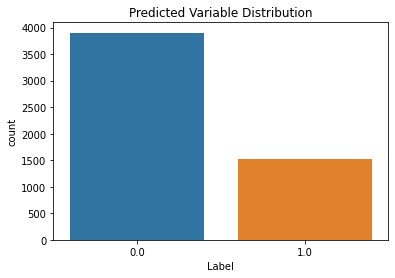

In [555]:
# Check the distribution of your predictions
sns.countplot(x = sub_file.Label)
plt.title('Predicted Variable Distribution');

In [556]:
# Create a csv file and upload to zindi 
sub_file.to_csv('Baseline.csv', index = False)
sub_file.head()

,Sample_ID,Label
0,10865,0.0
1,10866,0.0
2,10867,0.0
3,10868,0.0
4,10869,1.0


In [645]:
# Select main columns to be used in training
main_cols = train.columns.difference(['Sample_ID', 'Label'])
X = train[main_cols]
y = train.Label

# SMOTE
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state = 2022)
#X, y = sm.fit_resample(X, y.ravel())

# UNDERSAMPLE
#landslides = train[train.Label == 1]
#non_landslides = train[train.Label == 0]
#less_non_landslides = non_landslides.sample(n=len(landslides) + 900)
#t = pd.concat([less_non_landslides, landslides])

#X = t[main_cols]
#y = t.Label

# OVERSAMPLE
landslides = train[train.Label == 1]
non_landslides = train[train.Label == 0]

t = pd.concat([non_landslides, landslides, landslides, landslides])

X = t[main_cols]
y = t.Label

In [646]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.34, random_state=2022)

# Train model
model = RandomForestClassifier(n_estimators=450, random_state = 2022, max_features="sqrt")
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check the auc score of the model
print(f'RandomForest F1 score on the X_test is: {f1_score(y_test, y_pred)}\n')

# print classification report
print(classification_report(y_test, y_pred))

RandomForest F1 score on the X_test is: 0.9194743935309974

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      2725
           1       0.87      0.97      0.92      2816

    accuracy                           0.91      5541
   macro avg       0.92      0.91      0.91      5541
weighted avg       0.92      0.91      0.91      5541



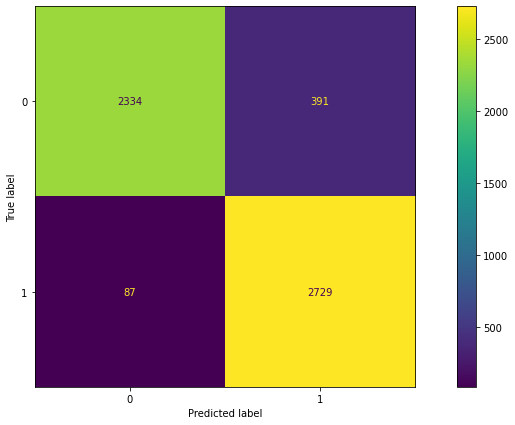

In [647]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(15,7))
disp.plot(ax=ax)
plt.show()

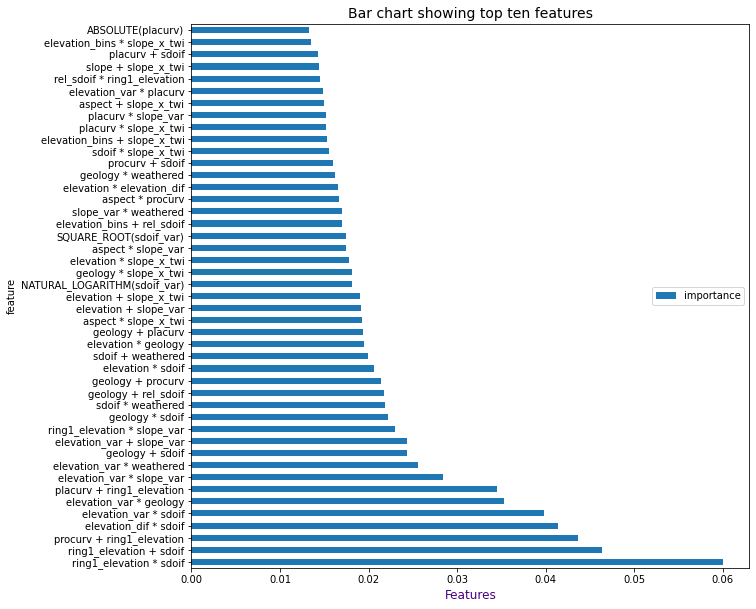

In [648]:
# Feature importance
impo_df = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df = impo_df.sort_values(by = 'importance', ascending = False)
impo_df.plot(kind = 'barh', figsize = (10, 10))
plt.legend(loc = 'center right')
plt.title('Bar chart showing top ten features', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

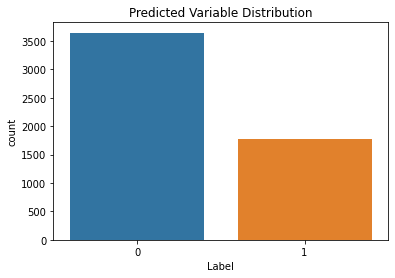

In [649]:
# Make prediction on the test set
test_df = test[main_cols]
predictions = model.predict(test_df)

# Create a submission file
sub_file = pd.DataFrame({'Sample_ID': test.Sample_ID, 'Label': predictions})

# Check the distribution of your predictions
sns.countplot(x = sub_file.Label)
plt.title('Predicted Variable Distribution');

In [650]:
# Create a csv file and upload to zindi 
sub_file.to_csv('Baseline.csv', index = False)
sub_file.head()

,Sample_ID,Label
0,10865,0
1,10866,0
2,10867,0
3,10868,0
4,10869,1


In [651]:
train = pd.read_csv('new_df.csv')
test = pd.read_csv('new_test.csv')

In [662]:
test.columns = test.columns.str.replace('+', 'p')
test.columns = test.columns.str.replace(' ', '_')
test.columns = test.columns.str.replace('*', 'x')

In [663]:
test.columns.values

array(['Unnamed:_0', 'ABSOLUTE(placurv)', 'aspect_p_slope_x_twi',
       'elevation_p_slope_var', 'elevation_p_slope_x_twi',
       'elevation_bins_p_rel_sdoif', 'elevation_bins_p_slope_x_twi',
       'elevation_var_p_slope_var', 'geology_p_placurv',
       'geology_p_procurv', 'geology_p_rel_sdoif', 'geology_p_sdoif',
       'placurv_p_ring1_elevation', 'placurv_p_sdoif',
       'procurv_p_ring1_elevation', 'procurv_p_sdoif',
       'ring1_elevation_p_sdoif', 'sdoif_p_weathered',
       'slope_p_slope_x_twi', 'aspect_x_procurv', 'aspect_x_slope_var',
       'aspect_x_slope_x_twi', 'elevation_x_elevation_dif',
       'elevation_x_geology', 'elevation_x_sdoif',
       'elevation_x_slope_x_twi', 'elevation_bins_x_slope_var',
       'elevation_bins_x_slope_x_twi', 'elevation_dif_x_sdoif',
       'elevation_var_x_geology', 'elevation_var_x_placurv',
       'elevation_var_x_sdoif', 'elevation_var_x_slope_var',
       'elevation_var_x_weathered', 'geology_x_sdoif',
       'geology_x_slope_x_

In [664]:
train.to_csv('joh.csv')

In [665]:
test.to_csv('joh_test.csv')